# Project 03 (Predict Car Price)

In [16]:
import pandas as pd
import numpy as np
import seaborn as sea 
import matplotlib.pyplot as plt

In [17]:
# load the data set
df = pd.read_csv("./ford.csv")
print(df.head())

     model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0


## EDA

In [18]:
# check the shape of the data
print(df.shape)

(17966, 9)


In [19]:
# check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB
None


In [20]:
# describe the data set
print(df.describe())

               year         price        mileage           tax           mpg  \
count  17966.000000  17966.000000   17966.000000  17966.000000  17966.000000   
mean    2016.866470  12279.534844   23362.608761    113.329456     57.906980   
std        2.050336   4741.343657   19472.054349     62.012456     10.125696   
min     1996.000000    495.000000       1.000000      0.000000     20.800000   
25%     2016.000000   8999.000000    9987.000000     30.000000     52.300000   
50%     2017.000000  11291.000000   18242.500000    145.000000     58.900000   
75%     2018.000000  15299.000000   31060.000000    145.000000     65.700000   
max     2060.000000  54995.000000  177644.000000    580.000000    201.800000   

         engineSize  
count  17966.000000  
mean       1.350807  
std        0.432367  
min        0.000000  
25%        1.000000  
50%        1.200000  
75%        1.500000  
max        5.000000  


In [21]:
# check all null values
total_null = df.isnull().sum()
print(f"Total null values in data set is : {total_null}")

Total null values in data set is : model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [22]:
# now check duplicate values
total_duplicates = df.duplicated().sum()
print(f"Total Duplicate values: {total_duplicates}")

Total Duplicate values: 154


In [23]:
# now remove all duplicate values from our dataset
df = df.drop_duplicates()
print(f"Total Duplicate values: {df.duplicated().sum()}")


Total Duplicate values: 0


<Axes: xlabel='price', ylabel='Count'>

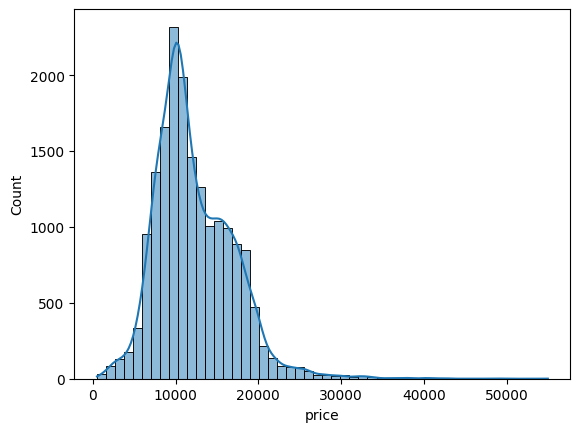

In [25]:
# now check the distribution of price
sea.histplot(df["price"], bins=50, kde=True)

## Co-relation between our columns and price 

<Axes: >

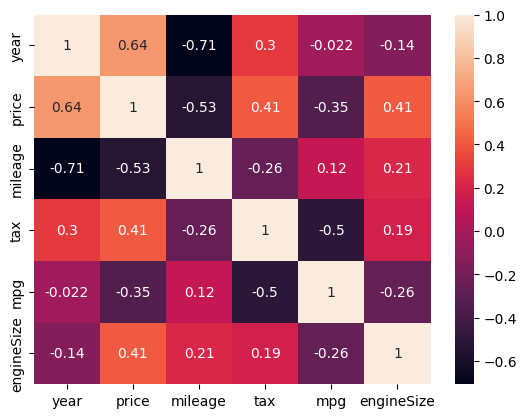

In [27]:
# co-relation by numeric columns
sea.heatmap(df.corr(numeric_only=True), annot=True)

In [28]:
print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2060')])

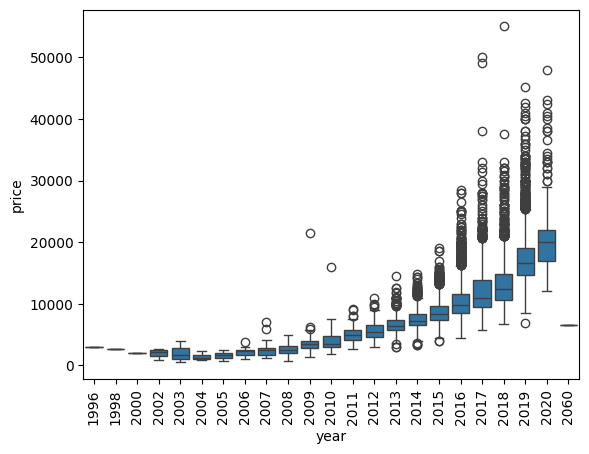

In [ ]:
sea.boxplot(data=df , x="year", y="price") # USE
plt.xticks(rotation = 90)
# mean there is best co-relation between price and year

<Axes: xlabel='mileage', ylabel='price'>

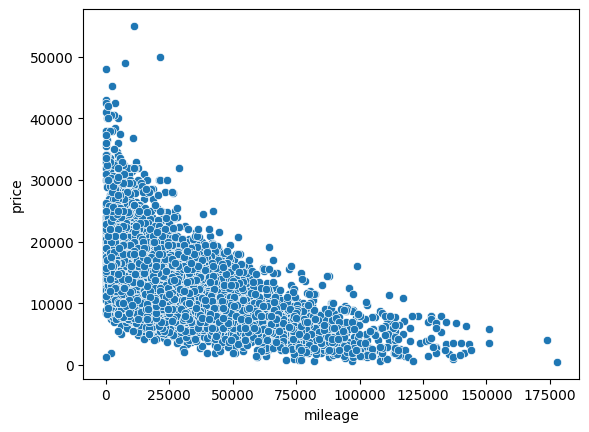

In [ ]:
sea.scatterplot(data=df , x="mileage", y="price") # 50, 50 Chance to use


<Axes: xlabel='fuelType', ylabel='price'>

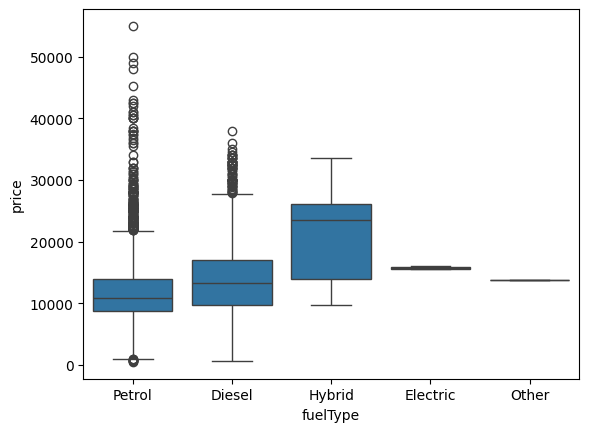

In [ ]:
sea.boxplot(data=df , x="fuelType", y="price") # USE


<Axes: xlabel='transmission', ylabel='price'>

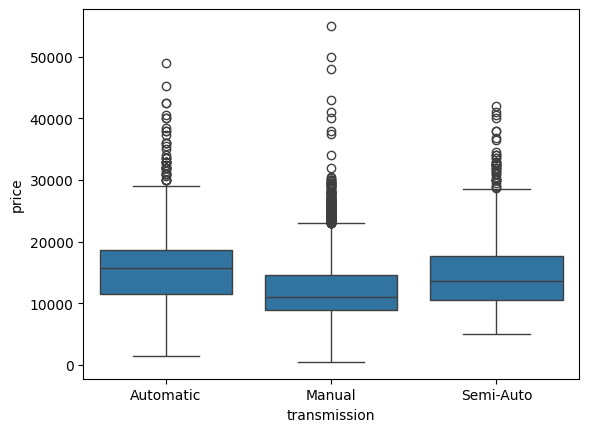

In [ ]:
sea.boxplot(data=df , x="transmission", y="price") # almost same price


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

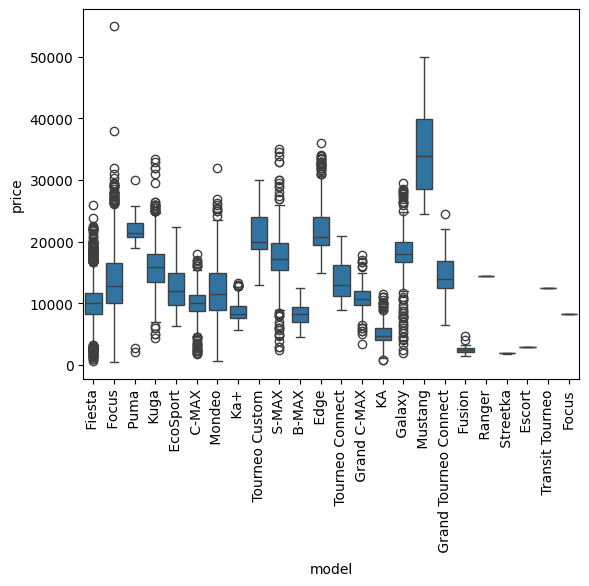

In [ ]:
sea.boxplot(data=df , x="model", y="price") # USE
plt.xticks(rotation = 90)

<Axes: xlabel='engineSize', ylabel='price'>

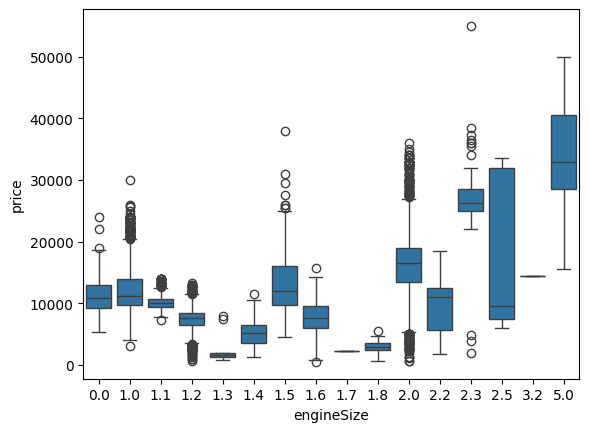

In [ ]:
sea.boxplot(data=df , x="engineSize", y="price") # USE


In [62]:
X = df.drop(columns=["price"])
Y = df[["price"]]

### Now Convert our all categorical values into numeric
 

In [46]:
print(X.head())

     model  year transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019    Automatic     1482   Petrol  145  48.7         1.0


In [55]:
# on-hot-encoding
x_one_encoding = pd.get_dummies(X , columns=["model","transmission","fuelType"], drop_first=True)
x_one_encoding = x_one_encoding.astype(int)
x_one_encoding

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [51]:
# label encoding
from sklearn.preprocessing import LabelEncoder

columns = ["model","transmission","fuelType"]

x_label_encoding = X.copy()
for col in columns:
    encoder = LabelEncoder()
    x_label_encoding[col] = encoder.fit_transform(x_label_encoding[col])
x_label_encoding

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [56]:
# now scaler our data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale all x_one_encoded dataset
one_columns = ["year", "mileage", "tax", "mpg"]
x_one_encoding[one_columns] = scaler.fit_transform(x_one_encoding[one_columns])
x_one_encoding

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.067059,-0.382994,0.591380,-0.042291,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.554393,-0.736317,0.591380,-0.042291,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.067059,-0.562616,0.591380,-0.042291,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.041726,-0.665405,0.510777,-1.720193,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.041726,-1.127749,0.510777,-0.930592,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.067059,-0.344061,0.591380,-1.029292,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,-1.394942,0.891875,-1.343079,-0.042291,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,-0.907608,-0.843071,-1.504284,0.944711,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,0.554393,-0.946220,0.510777,-0.042291,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [57]:
# now scaler our label data set

label_columns = ["model","year","transmission","mileage","fuelType","tax","mpg","engineSize"]
x_label_encoding[label_columns] = scaler.fit_transform(x_label_encoding[label_columns])
x_label_encoding

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460281,0.067059,-2.667947,-0.382994,0.688206,0.591380,-0.020597,-0.810561
1,-0.210828,0.554393,0.042455,-0.736317,0.688206,0.591380,-0.020597,-0.810561
2,-0.210828,0.067059,0.042455,-0.562616,0.688206,0.591380,-0.020597,-0.810561
3,-0.460281,1.041726,0.042455,-0.665405,0.688206,0.510777,-1.737858,0.345325
4,-0.460281,1.041726,-2.667947,-1.127749,0.688206,0.510777,-0.908836,-0.810561
...,...,...,...,...,...,...,...,...
17961,-1.707547,0.067059,0.042455,-0.344061,0.688206,0.591380,-1.066745,0.114148
17962,-1.707547,-1.394942,0.042455,0.891875,0.688206,-1.343079,-0.020597,-0.810561
17963,-0.210828,-0.907608,0.042455,-0.843071,-1.455326,-1.504284,0.926858,0.576502
17964,1.036438,0.554393,0.042455,-0.946220,0.688206,0.510777,-0.020597,-0.348206


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Model 1 (x_one_encoding)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x_one_encoding, Y, test_size=0.33, random_state=42)
model1 = LinearRegression()
model1.fit(X_train , y_train)

LinearRegression()

In [71]:
y1_predict = model1.predict(X_test)
y1_predict

array([[22211.67805925],
       [15037.33325529],
       [16540.89418284],
       ...,
       [15095.04684122],
       [12870.16427509],
       [15253.28175323]])

In [66]:
Y

,price
0,12000
1,14000
2,13000
3,17500
4,16500
...,...
17961,8999
17962,7499
17963,9999
17964,8299


In [ ]:
r2_01 = r2_score(y_test,y1_predict)
r2_01

0.8310659101766334

In [69]:
n = x_one_encoding.shape[0]
p = x_one_encoding.shape[1]
r2_1_adjust = 1 - ( (1 - r2_01) * (n - 1) / (n - p -1) )
r2_1_adjust

0.8307428095941958

## Model 2 (label encoding)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x_label_encoding, Y, test_size=0.33, random_state=42)
model2 = LinearRegression()
model2.fit(X_train , y_train)

LinearRegression()

In [74]:
y2_predict = model2.predict(X_test)
y2_predict

array([[16540.94185432],
       [15076.66531175],
       [16754.43591901],
       ...,
       [13428.26494596],
       [13136.81760351],
       [13571.38462746]])

In [76]:
r2_02 = r2_score(y_test, y2_predict)
r2_02

0.7167444123752094

In [77]:
n = x_label_encoding.shape[0]
p = x_label_encoding.shape[1]
r2_2_adjust = 1 - ( (1 - r2_01) * (n - 1) / (n - p -1) )
r2_2_adjust

0.8309899975372701